In [2]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [3]:
# %matplotlib widget
# _ = plot_entropy()


In [4]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [5]:
#For instance, the first example
X_train[0]

array([1, 1, 1])

In [6]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p*np.log2(p) - (1-p)*np.log2(1-p)

print(entropy(0.5))

1.0


In [7]:
def split_indices(X, index_feature):
    left_inds = []
    right_inds = []
    for i, x in enumerate(X):
        if x[index_feature] == 1:
            left_inds.append(i)
        else:
            right_inds.append(i)
    return left_inds, right_inds 

In [8]:
split_indices(X_train, 0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

In [9]:
def weighted_entropy(X,y,left_indices,right_indices):
    w_left = len(left_indices) / len(X)
    w_right = len(right_indices) / len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)

    weighted_entrop = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entrop

In [10]:
left_indices, right_indices = split_indices(X_train, 0)
weighted_entropy(X_train, y_train, left_indices, right_indices)

0.7219280948873623

In [11]:
def information_gain(X, y, left_indices, right_indices):
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X, y, left_indices, right_indices)
    return h_node - w_entropy

In [12]:
information_gain(X_train, y_train, left_indices, right_indices)


0.2780719051126377

In [14]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain: {i_gain:.2f}")


Feature: Ear Shape, information gain: 0.28
Feature: Face Shape, information gain: 0.03
Feature: Whiskers, information gain: 0.12


## All

In [22]:
def split_dataset_mh(X, node_indices, feature):

    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
        
    return left_indices, right_indices   

In [23]:

def get_best_split_mh(X, y, node_indices):   
    num_features = X.shape[1]
    
    best_feature = -1

    max_info_gain = 0
    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, feature)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature
   
    return best_feature

In [24]:
# 
def build_tree_recursive_mh(X, y, node_indices, branch_name, max_depth, current_depth, tree):

    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   

    best_feature = get_best_split_mh(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    

    left_indices, right_indices = split_dataset_mh(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    build_tree_recursive_mh(X, y, left_indices, "Left", max_depth, current_depth+1, tree)
    build_tree_recursive_mh(X, y, right_indices, "Right", max_depth, current_depth+1, tree)
    return tree

 Depth 0, Root: Split on feature: 0
 - Left leaf node with indices [0, 3, 4, 5, 7]
 - Right leaf node with indices [1, 2, 6, 8, 9]


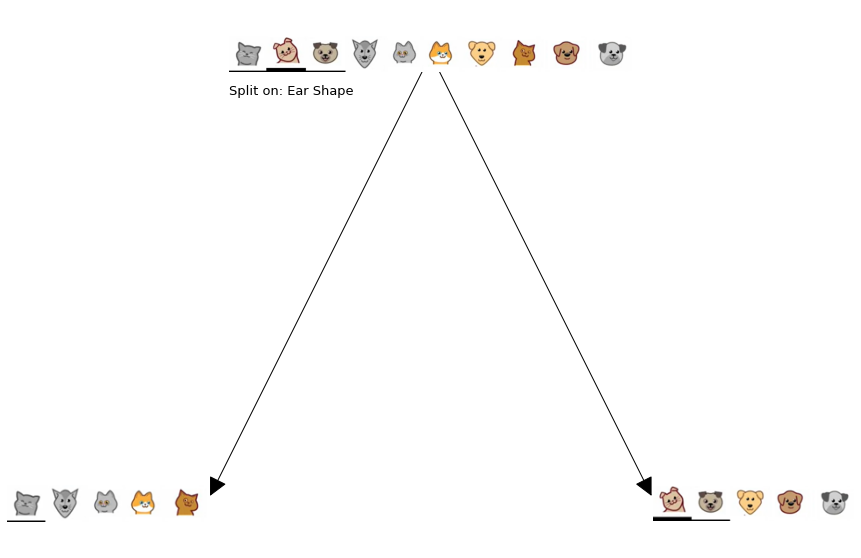

In [26]:
tree = []
build_tree_recursive_mh(X_train, y_train, [0,1,2,3,4,5,6,7,8,9], "Root", max_depth=1, current_depth=0, tree = tree)
generate_tree_viz([0,1,2,3,4,5,6,7,8,9], y_train, tree)

 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 1
  -- Left leaf node with indices [0, 4, 5, 7]
  -- Right leaf node with indices [3]
- Depth 1, Right: Split on feature: 2
  -- Left leaf node with indices [1]
  -- Right leaf node with indices [2, 6, 8, 9]


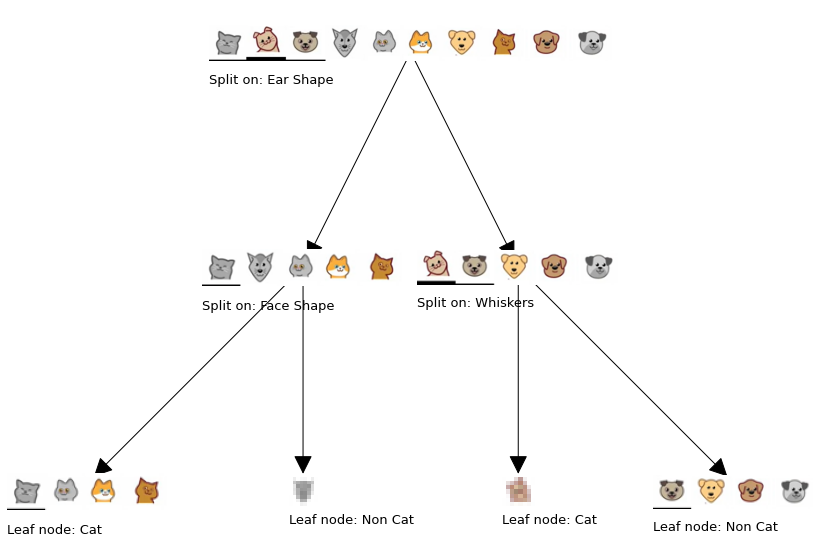

In [27]:
tree = []
build_tree_recursive_mh(X_train, y_train, [0,1,2,3,4,5,6,7,8,9], "Root", max_depth=2, current_depth=0, tree = tree)
generate_tree_viz([0,1,2,3,4,5,6,7,8,9], y_train, tree)